In [3]:
!pip install arch

     |████████████████████████████████| 727kB 4.7MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as sts
from scipy.stats.distributions import chi2
import seaborn as sns; sns.set()

In [0]:
raw_csv_data = pd.read_csv("IndexE8.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method="ffill")

In [0]:
df_comp["market_value"] = df_comp.ftse

In [0]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [6]:
df["returns"] = df.market_value.pct_change(1).mul(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df["sq_returns"] = df.returns.mul(df.returns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


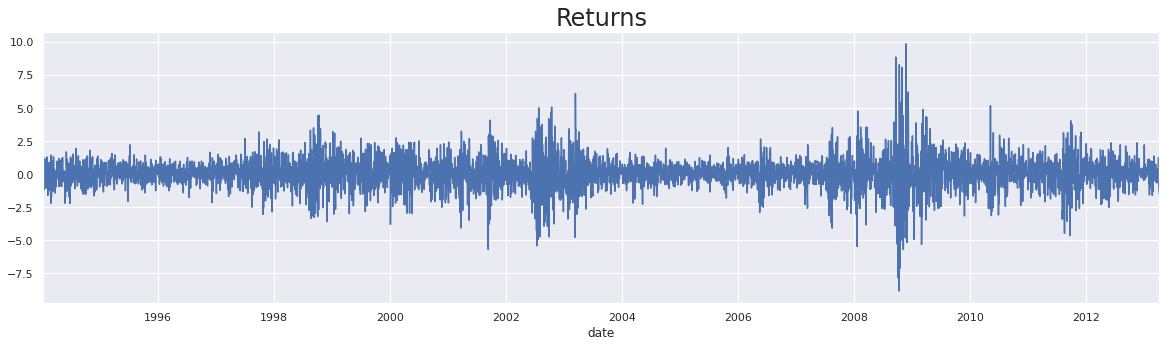

In [8]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size=24)
plt.show()

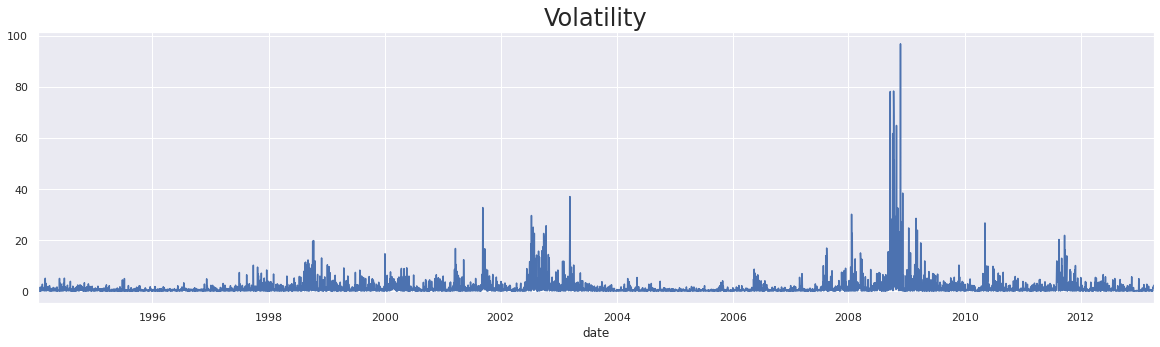

In [9]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size=24)
plt.show()

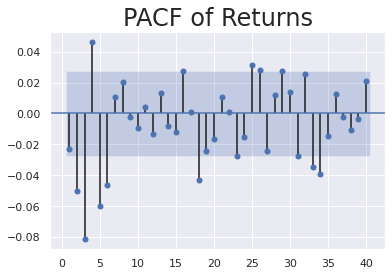

In [10]:
sgt.plot_pacf(df.returns[1:], lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF of Returns", size=24)
plt.show()

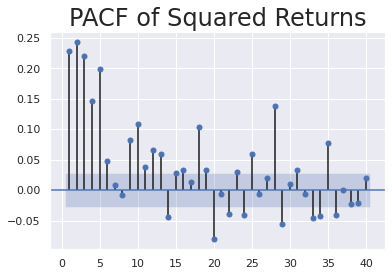

In [11]:
sgt.plot_pacf(df.sq_returns[1:], lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF of Squared Returns", size=24)
plt.show()

In [0]:
from arch import arch_model

In [13]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6987.996939333616
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6984.811181080089
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6982.851348555168
Iteration:      4,   Func. Count:     32,   Neg. LLF: 6974.872814051393
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6972.734736835859
Iteration:      6,   Func. Count:     46,   Neg. LLF: 6971.647375239638
Iteration:      7,   Func. Count:     53,   Neg. LLF: 6970.755806242594
Iteration:      8,   Func. Count:     60,   Neg. LLF: 6970.289550003461
Iteration:      9,   Func. Count:     67,   Neg. LLF: 6970.132426204183
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6970.088042271316
Iteration:     11,   Func. Count:     79,   Neg. LLF: 6970.058478429418
Iteration:     12,   Func. Count:     85,   Neg. LLF: 6970.058367485686
Iteration:     13,   Func. Count:     91,   Neg. LLF: 6970.058366189178
Optimization terminated successfully.    (Exit mode 0)
         

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Mon, Mar 16 2020   Df Residuals:                     5016
Time:                        23:16:01   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

In [14]:
model_arch_1 = arch_model(df.returns[1:], mean="Constant", vol="ARCH", p=1)
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7661.953060893903
Iteration:      2,   Func. Count:     14,   Neg. LLF: 7661.175116935157
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7660.278630806879
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7660.098463946289
Iteration:      5,   Func. Count:     34,   Neg. LLF: 7660.088789377838
Iteration:      6,   Func. Count:     39,   Neg. LLF: 7660.088782040906
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7660.088782040875
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Mon, Mar 16 2020   Df Residuals:                     5017
Time:                        23:17:30   Df Model:                            3
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0345  1.603e-02      2.151  3.147e-02 [3.063e-03,6.590e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9206  4.309e-02     21.365 2.855e-101 [  0.836,  1.005]
alpha[1]       0.3684  5.040e-02      7.310  2.673e-13 [  0.270,  0.467]
========================================================================

Covariance estimator: robust
"""

In [15]:
model_arch_2 = arch_model(df.returns[1:], mean="Constant", vol="ARCH", p=2)
results_arch_2 = model_arch_2.fit()
results_arch_2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7453.218168137268
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7451.916962214617
Iteration:      3,   Func. Count:     26,   Neg. LLF: 7451.8651812702465
Iteration:      4,   Func. Count:     34,   Neg. LLF: 7450.94727819419
Iteration:      5,   Func. Count:     41,   Neg. LLF: 7449.870533644225
Iteration:      6,   Func. Count:     49,   Neg. LLF: 7449.567251832594
Iteration:      7,   Func. Count:     55,   Neg. LLF: 7449.551200477554
Iteration:      8,   Func. Count:     61,   Neg. LLF: 7449.545177542715
Iteration:      9,   Func. Count:     67,   Neg. LLF: 7449.545164098206
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7449.545164098316
            Iterations: 9
            Function evaluations: 67
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Mon, Mar 16 2020   Df Residuals:                     5016
Time:                        23:20:07   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0484  1.401e-02      3.455  5.495e-04 [2.095e-02,7.585e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6978  3.564e-02     19.580  2.272e-85 [  0.628,  0.768]
alpha[1]       0.2202  3.474e-02      6.339  2.311e-10 [  0.152,  0.288]
alpha[2]       0.2783  3.645e-02      7.635  2.260e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""